In [ ]:
variant = 6

**Object**

In [ ]:
from scipy.integrate import odeint
import numpy as np

class real_object:
    def __init__(self, variant):
        self._var = variant
        self._ctrl_fcn = real_object._default_control
        self.lin_par_1 = variant % 10 * 0.2
        self.lin_par_2 = ((32-variant) % 9 +0.1 ) * 2.5
        self.nonlin_par_1 = variant % 15 * 0.35
        self.nonlin_par_2 = variant % 12 * 0.45
        self.nonlin_fcns = [self.deadZone, self.saturation, self.relay]
        self.nonlin_names = ['deadZone', 'saturation', 'relay']
        self.nonlin_type = variant % 3
        self._params = [self.lin_par_1, self.lin_par_2, self.nonlin_par_1, self.nonlin_par_2]
        print(self.lin_par_1, self.lin_par_2, self.nonlin_par_1, self.nonlin_par_2)

    def deadZone(self, x, p1, p2):
        if np.abs(x) < p1:
            x = 0
        elif x > 0:
            x = x - p1
        elif x < 0:
            x = x + p2
        return x

    def saturation(self, x, p1, p2):
        if x > p1:
            x = p1
        elif x < -p2:
            x = -p2
        return x

    def relay(self, x, p1, p2):
        if x > 0:
            return p1
        else:
            return -p2

    def _ode(self, x, t, k):
        '''
        Функция принимает на вход вектор переменных состояния и реализует по сути систему в форме Коши
        x -- текущий вектор переменных состояния
        t -- текущее время
        k -- значения параметров
        '''
        y = x
        u = self._get_u(x, t)
        lin_par_1, lin_par_2, nonlin_par_1, nonlin_par_2 = k

        dydt = (lin_par_1 * self.nonlin_fcns[self.nonlin_type](u, nonlin_par_1, nonlin_par_2) - x) / lin_par_2
        return dydt

    def _default_control(x, t):
        """
        Управление по умолчанию. Нулевой вход
        """
        return 0

    def _get_u(self, x, t):
        """
        Получить значение управления при значениях переменных состояния x и времени t
        """
        return self._ctrl_fcn(x, t)

    def set_u_fcn(self, new_u):
        """
        Установить новую функцию управления
        формат функции: fcn(x, t)
        """
        self._ctrl_fcn = new_u

    def calcODE(self, y0, ts=50, nt=1001):
        """
        Вспомогательная функция для получения решения систему ДУ, "Проведение эксперимента" с заданным воздействием
        """
        y0 = [y0,]
        t = np.linspace(0, ts, nt)
        args = (self._params, )
        sol = odeint(self._ode, y0, t, args)
        return sol, t

    def getODE(self):
        """
        Получить "идеальную" модель объекта без параметров
        """
        return self._ode

    def get_nonlinear_element_type(self):
        return self.nonlin_names[self.nonlin_type]

**Свободные движения объекта**

1.2000000000000002 20.25 2.0999999999999996 2.7


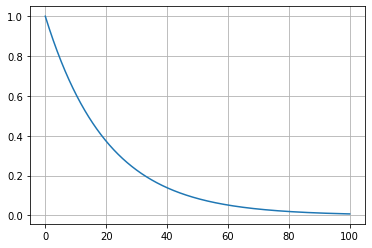

In [ ]:
import matplotlib.pyplot as plt

obj = real_object(variant)
sol, t = obj.calcODE(y0 = 1, ts = 100)
plt.plot(t, sol)
plt.grid()

**Моногармонический сигнал**

1.2000000000000002 20.25 2.0999999999999996 2.7


(0.0, 9.0)

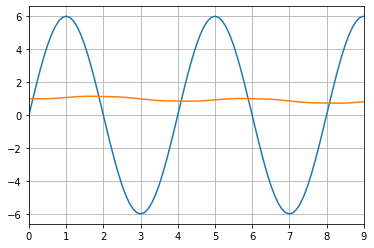

In [ ]:
def monoharm_u(x, t):
    return 6*np.sin(t * 0.5 * np.pi)

#Создаем экземпляр класса объекта
obj = real_object(variant)

#Задаем функцию управления (в нашем случает тестовый моногармонический сигнал)
obj.set_u_fcn(monoharm_u)

# Задаем начальные условия
y0 = 1

# Проводим эксперимент
sol, t = obj.calcODE(y0, ts = 100)
# И строим управляющее воздействие. В случае, если функция управления -- скалярная, то ее стоит векторизовать.
u = monoharm_u(0, t)

# Строим графики входа и выходов системы
plt.plot(t, u)
plt.plot(t, sol)
plt.grid()
plt.xlim(0, 9)

**Импульсное воздействие длинной 0,01 с и амплитудой 100 (приблилительная аппроксимация дельта-функции)**

1.2000000000000002 20.25 2.0999999999999996 2.7


(0.0, 1.2)

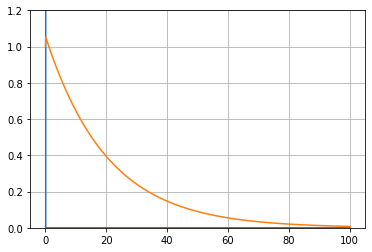

In [ ]:
def impulse(x,t):
  if t < 0.01:
    return 100
  else:
    return 0

#Создаем экземпляр класса объекта
obj = real_object(variant)

#Задаем функцию управления (в нашем случает тестовый моногармонический сигнал)
obj.set_u_fcn(impulse)

# Задаем начальные условия
y0 = 1

# Проводим эксперимент
sol, t = obj.calcODE(y0, ts = 100)
# И строим управляющее воздействие. В случае, если функция управления -- скалярная, то ее стоит векторизовать.
impulse = np.vectorize(impulse, otypes=[np.float])
u = impulse(0, t)

# Строим графики входа и выходов системы
plt.plot(t, u)
plt.plot(t, sol)
plt.grid()
plt.ylim(0, 1.2)

**Единичное ступенчатое воздействие**

1.2000000000000002 20.25 2.0999999999999996 2.7


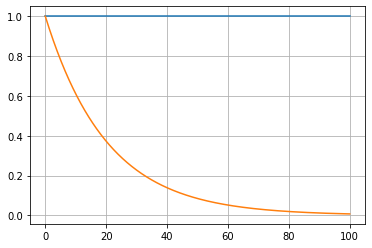

In [ ]:
def step(x, t):
    if t >= 0:
      return 1
    else :
      return 0

#Создаем экземпляр класса объекта
obj = real_object(variant)

#Задаем функцию управления (в нашем случает тестовый моногармонический сигнал)
obj.set_u_fcn(step)

# Задаем начальные условия
y0 = 1

# Проводим эксперимент
sol, t = obj.calcODE(y0, ts = 100)
# И строим управляющее воздействие. В случае, если функция управления -- скалярная, то ее стоит векторизовать.
step = np.vectorize(step, otypes=[np.float])
u = step(0, t)

# Строим графики входа и выходов системы
plt.plot(t, u)
plt.plot(t, sol)
plt.grid()

**Меандр**

1.2000000000000002 20.25 2.0999999999999996 2.7


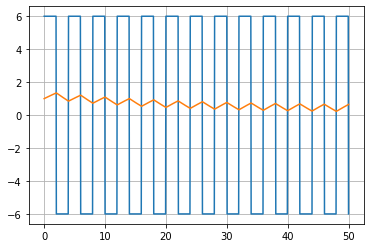

In [ ]:
from scipy import signal

def meandr(x, t):
  return 6*signal.square(t * 0.5 * np.pi)

#Создаем экземпляр класса объекта
obj = real_object(variant)

#Задаем функцию управления (в нашем случает тестовый моногармонический сигнал)
obj.set_u_fcn(meandr)

# Задаем начальные условия
y0 = 1

# Проводим эксперимент
sol, t = obj.calcODE(y0, ts = 50)
# И строим управляющее воздействие. В случае, если функция управления -- скалярная, то ее стоит векторизовать.
u = meandr(0, t)

# Строим графики входа и выходов системы
plt.plot(t, u)
plt.plot(t, sol)
plt.grid()

**Cлучайное воздействие типа "белый шум" или "окрашенный шум"**

1.2000000000000002 20.25 2.0999999999999996 2.7


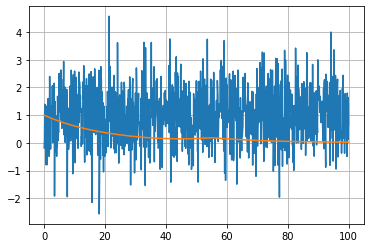

In [ ]:
def noise(x, t):
  return np.random.normal(1,1)

noise = np.vectorize(noise, otypes=[np.float])

#Создаем экземпляр класса объекта
obj = real_object(variant)

#Задаем функцию управления (в нашем случает тестовый моногармонический сигнал)
obj.set_u_fcn(noise)

# Задаем начальные условия
y0 = 1

# Проводим эксперимент
sol, t = obj.calcODE(y0, ts = 100)
# И строим управляющее воздействие. В случае, если функция управления -- скалярная, то ее стоит векторизовать.
u = noise(0, t)

# Строим графики входа и выходов системы
plt.plot(t, u)
plt.plot(t, sol)
plt.grid()

**Создание модели и оценка ее параметров**

In [ ]:
from scipy import optimize
from scipy import integrate, interpolate

class parameter_estimator():
    def __init__(self, experiments, f):
        """
        experiments -- список кортежей с данными экспериментов в формате [x_data, y_data] (вход, выход)
        f -- функция, реализующая дифференциальное уравнение модели
        """
        self._experiments = experiments
        self._f = f
        # Предполагаем, что все переменные состояния наблюдаемые, однако в общем случае это не так
        x_data, y_data = experiments[0]
        self.n_observed = 1 # y_data.shape[1]

    def my_ls_func(self, x, teta):
        """
        Определение функции, возвращающей значения решения ДУ в
        процессе оценки параметров
        x заданные (временные) точки, где известно решение
        (экспериментальные данные)
        teta -- массив с текущим значением оцениваемых параметров.
        Первые self._y0_len элементов -- начальные условия,
        остальные -- параметры ДУ
        """
        # Для передачи функуии используем ламбда-выражение с подставленными
        # параметрами
        # Вычислим значения дифференциального уравления в точках "x"
        r = integrate.odeint(lambda y, t: self._f(y, t, teta[self._y0_len:]),
                             teta[0:self._y0_len], x)
        # Возвращаем только наблюдаемые переменные
        return r[:, 0:self.n_observed]

    def estimate_ode(self, y0, guess):
        """
        Произвести оценку параметров дифференциального уравнения с заданными
        начальными значениями параметров:
            y0 -- начальные условия ДУ
            guess -- параметры ДУ
        """
        # Сохраняем число начальных условий
        self._y0_len = len(y0)
        # Создаем вектор оцениваемых параметров,
        # включающий в себя начальные условия
        est_values = np.concatenate((y0, guess))
        c = self.estimate_param(est_values)
        # В возвращаемом значении разделяем начальные условия и параметры
        return c[self._y0_len:], c[0:self._y0_len]

    def f_resid(self, p):
        """
        Функция для передачи в optimize.leastsq
        При дальнейших вычислениях значения, возвращаемые этой функцией,
        будут возведены в квадрат и просуммированы.

        """
        delta = []
        # Получаем ошибку для всех экспериментов при заданных параметрах модели
        for data in self._experiments:
            x_data, y_data = data
            d = y_data - self.my_ls_func(x_data, p)
            d = d.flatten()
            delta.append(d)
        delta = np.array(delta)

        return delta.flatten()  # Преобразуем в одномерный массив

    def calcODE(self, args, y0, x0=0, xEnd=10, nt=1001):
        """
        Служебная функция для решения ДУ
        """
        t = np.linspace(x0, xEnd, nt)
        sol = odeint(self._f, y0, t, args)
        return sol, t

    def estimate_param(self, guess):
        """
        Произвести оценку параметров ДУ
            guess -- параметры ДУ
        """
        self._est_values = guess
        # Решить оптимизационную задачу - решение в переменной c
        res = optimize.least_squares(self.f_resid, self._est_values)
        return res.x

**Линейная модель**

In [ ]:
def lin(signal):
  guess = [1.2, 10.5, 2.1, 2.7]  # Начальные значения для параматров системы
  y0 = [1, ]  # Стартовые начальные значения для системы ДУ

  #Создаем экземпляр класса объекта
  obj = real_object(variant)

  #Задаем функцию управления (в нашем случает тестовый моногармонический сигнал)
  obj.set_u_fcn(signal)

  sol, t = obj.calcODE(y0[0])

  estimator = parameter_estimator([[t, sol],], obj.getODE())
  est_par = estimator.estimate_ode(y0, guess)
  print("Estimated parameter: {}".format(est_par[0]))
  print("Estimated initial condition: {}".format(est_par[1]))

  # Строим графики входа и выходов системы
  y0 = est_par[1]
  args = (est_par[0],)
  sol_ideal = odeint(obj.getODE(), y0, t, args)

  plt.plot(t, sol_ideal, label = 'Linear')
  plt.plot(t, sol, label = 'True')
  plt.grid()
  plt.legend()

**Моногармонический сигнал**

1.2000000000000002 20.25 2.0999999999999996 2.7
Estimated parameter: [ 1.2 10.5  2.1  2.7]
Estimated initial condition: [1.]


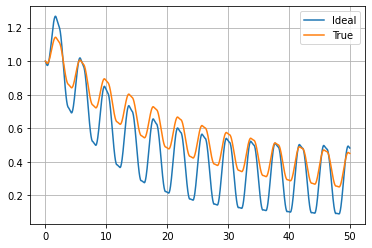

In [ ]:
lin(monoharm_u)

**Импульсное воздействие длинной 0,01 с и амплитудой 100 (приблилительная аппроксимация дельта-функции)**

1.2000000000000002 20.25 2.0999999999999996 2.7
Estimated parameter: [ 3.47248098 18.53903967  8.99692506  2.7       ]
Estimated initial condition: [1.01478042]


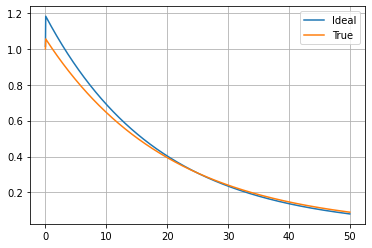

In [ ]:
lin(impulse)

**Единичное ступенчатое воздействие**

1.2000000000000002 20.25 2.0999999999999996 2.7
Estimated parameter: [-2.89043727 20.24999997  2.1         2.7       ]
Estimated initial condition: [1.]


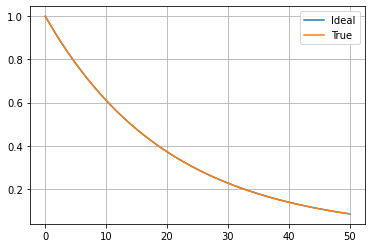

In [ ]:
lin(step)

**Меандр**

1.2000000000000002 20.25 2.0999999999999996 2.7
Estimated parameter: [ 1.20189358 10.61195682  2.0409759   2.74246417]
Estimated initial condition: [1.00505311]


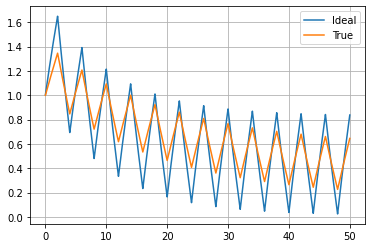

In [ ]:
lin(meandr)

**Cлучайное воздействие типа "белый шум" или "окрашенный шум"**

1.2000000000000002 20.25 2.0999999999999996 2.7
Estimated parameter: [ 1.20000191 10.50001453  2.10000015  2.70002152]
Estimated initial condition: [0.999989]


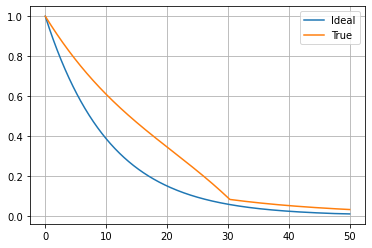

In [ ]:
lin(noise)

**Идеальная модель**

In [ ]:
def ode_idealModel(x, t, k):
    """
    Функция, рализующая систему ДУ маятника с трением
    """
    y = x
    K = k[0]
    T = k[1]
    u = monoharm_u(0, t)
    dydt = (K*u-y)/T
    return dydt

def idealModel(sig):
  guess = [1.2, 10.5]  # Начальные значения для параматров системы
  y0 = [1,]  # Стартовые начальные значения для системы ДУ

  obj = real_object(variant)
  obj.set_u_fcn(sig)
  sol, t = obj.calcODE(y0[0])

  estimator = parameter_estimator([[t, sol],], ode_idealModel)
  est_par = estimator.estimate_ode(y0, guess)
  print("Estimated parameter: {}".format(est_par[0]))
  print("Estimated initial condition: {}".format(est_par[1]))

  y0 = est_par[1]
  args = (est_par[0],)
  sol_idealModel = odeint(ode_idealModel, y0, t, args)

  plt.plot(t, sol_idealModel, label = "Ideal")
  plt.plot(t, sol, label = "True")
  plt.grid()
  plt.legend()

**Моногармонический сигнал**

1.2000000000000002 20.25 2.0999999999999996 2.7
Estimated parameter: [ 1.1689942  39.18996311]
Estimated initial condition: [0.91563239]


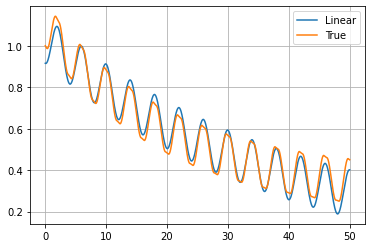

In [ ]:
idealModel(monoharm_u)

**Импульсное воздействие длинной 0,01 с и амплитудой 100 (приблилительная аппроксимация дельта-функции)**

1.2000000000000002 20.25 2.0999999999999996 2.7
Estimated parameter: [6.05935491e-04 2.02634445e+01]
Estimated initial condition: [1.05728975]


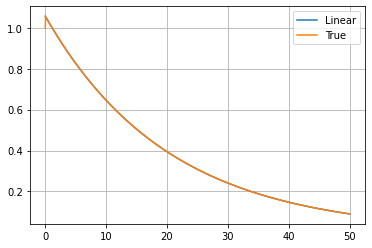

In [ ]:
idealModel(impulse)

**Единичное ступенчатое воздействие**

1.2000000000000002 20.25 2.0999999999999996 2.7
Estimated parameter: [-9.07785023e-07  2.02500027e+01]
Estimated initial condition: [1.00000017]


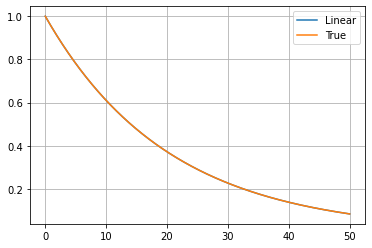

In [ ]:
idealModel(step)

**Меандр**

1.2000000000000002 20.25 2.0999999999999996 2.7
Estimated parameter: [ 2.00539496 44.32793397]
Estimated initial condition: [0.95269698]


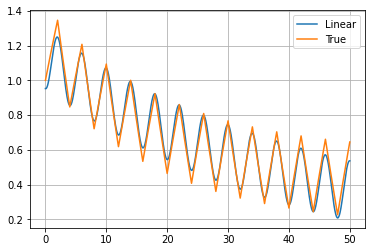

In [ ]:
idealModel(meandr)

**Cлучайное воздействие типа "белый шум" или "окрашенный шум"**

1.2000000000000002 20.25 2.0999999999999996 2.7
Estimated parameter: [9.15040092e-05 2.12948899e+01]
Estimated initial condition: [0.98702844]


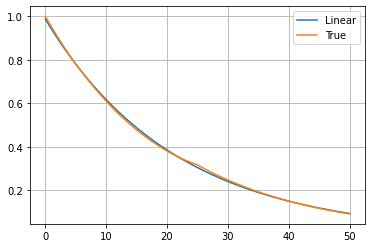

In [ ]:
idealModel(noise)

**Нелинейная модель**

In [ ]:
def deadZone(self, x, p1, p2):
  if np.abs(x) < p1:
    x = 0
  elif x > 0:
    x = x - p2
  elif x < 0:
    x = x + p2
  return x

def ode_nonlin(x, t ,k):
  dydt = deadZone(obj , x, k[0], k[1])
  return dydt

In [ ]:
def nonlin(sig):
  guess = [1.2, 10.5]  # Начальные значения для параматров системы
  y0 = [1,]  # Стартовые начальные значения для системы ДУ

  obj = real_object(variant)
  obj.set_u_fcn(sig)
  sol, t = obj.calcODE(y0[0])

  estimator = parameter_estimator([[t, sol],], ode_nonlin)
  est_par = estimator.estimate_ode(y0, guess)
  print("Estimated parameter: {}".format(est_par[0]))
  print("Estimated initial condition: {}".format(est_par[1]))

  y0 = est_par[1]
  args = (est_par[0],)
  sol_nonlin = odeint(ode_nonlin, y0, t, args)

  plt.plot(t, sol_nonlin, label = "Nonlinear")
  plt.plot(t, sol, label = "True")
  plt.grid()
  plt.legend()

**Моногармонический сигнал**

1.2000000000000002 20.25 2.0999999999999996 2.7
Estimated parameter: [ 1.2 10.5]
Estimated initial condition: [-1.65388866]


/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


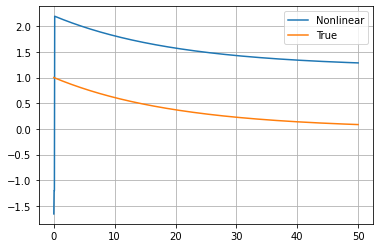

In [ ]:
def monoharm_nl(x, t):
    return 2*np.sin(t * 0.5 * np.pi)

nonlin(monoharm_nl)

**Импульсное воздействие длинной 0,01 с и амплитудой 100 (приблилительная аппроксимация дельта-функции)**

1.2000000000000002 20.25 2.0999999999999996 2.7
Estimated parameter: [ 1.2 10.5]
Estimated initial condition: [-1.65388866]


/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


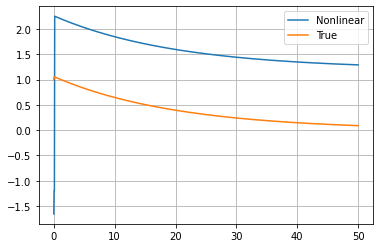

In [ ]:
def impulse_nl(x,t):
  if t < 0.01:
    return 100
  else:
    return 0

nonlin(impulse_nl)

**Единичное ступенчатое воздействие**

1.2000000000000002 20.25 2.0999999999999996 2.7
Estimated parameter: [ 1.2 10.5]
Estimated initial condition: [-1.65388866]


/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


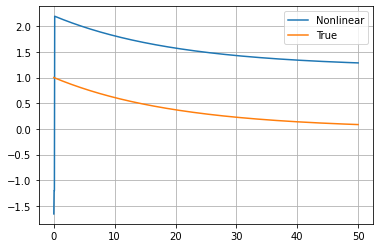

In [ ]:
def step_nl(x, t):
    if t >= 0:
      return 1
    else :
      return 0

nonlin(step_nl)

**Меандр**

1.2000000000000002 20.25 2.0999999999999996 2.7
Estimated parameter: [ 1.2 10.5]
Estimated initial condition: [-1.65388866]


/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


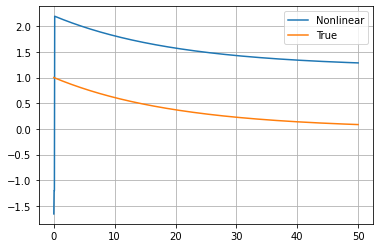

In [ ]:
from scipy import signal

def meandr_nl(x, t):
  return signal.square(t * 0.5 * np.pi)

nonlin(meandr_nl)

**Cлучайное воздействие типа "белый шум" или "окрашенный шум"**

1.2000000000000002 20.25 2.0999999999999996 2.7
Estimated parameter: [ 1.2 10.5]
Estimated initial condition: [-1.65388866]


/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


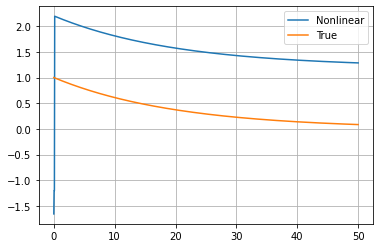

In [ ]:
def noise_nl(x, t):
  return np.random.normal(1,1)

noise_nl = np.vectorize(noise_nl, otypes=[np.float])

nonlin(noise_nl)

**Нейронная сеть**

In [ ]:
def series2dataset(data, seq_len):
    """
    Преобразование временной последовательнсти к формату датасета
    Шаг дискретизации должен быть постоянным
    """
    dataset = []
    for i in range(data.shape[0]-seq_len):
        r = np.copy(data[i:i+seq_len])
        dataset.append(r)
    return np.array(dataset)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))

obj = real_object(variant)
obj.set_u_fcn(step)
y0 = 1
sol, t = obj.calcODE(y0)

values = sol
model_order = 6
# Этой командой получается массив обучающих последовательностей с одного
# эксперимента, для работы с несколькими экспериментами, можно получить
# последовательно массивы отдельно по каждому эксперименту, а затем объединить
# массивы
x_values = series2dataset(values, model_order)
print(x_values.shape)

# Разделим на тестовую и обучающие выборки
# В случае использования нескольких экспериментов (>5), в качестве тестового
# лучше взять один из экспериментов целиком
n_train_samples = int(x_values.shape[0] * 0.7)

train_X = x_values[:n_train_samples, :]
test_X = x_values[n_train_samples:, :]

y_values = scaler.fit_transform(sol)
y_values = y_values[model_order:]
train_y = y_values[:n_train_samples]
test_y = y_values[n_train_samples:]

print("Shape of train is {}, {}, shape of test is {}, {}".format(train_X.shape,
                                                                 train_y.shape,
                                                                 test_X.shape,
                                                                 test_y.shape))

1.2000000000000002 20.25 2.0999999999999996 2.7
(995, 6, 1)
Shape of train is (696, 6, 1), (696, 1), shape of test is (299, 6, 1), (299, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

Epoch 1/100
10/10 [==============================] - 0s 42ms/step - loss: 0.3208 - val_loss: 0.8669
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.2790 - val_loss: 0.8382
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 0.2636 - val_loss: 0.7984
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.2513 - val_loss: 0.7570
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.2394 - val_loss: 0.7151
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.2265 - val_loss: 0.6710
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.2115 - val_loss: 0.6217
Epoch 8/100
10/10 [==============================] - 0s 8ms/step - loss: 0.1930 - val_loss: 0.5630
Epoch 9/100
10/10 [==============================] - 0s 8ms/step - loss: 0.1693 - val_loss: 0.4897
Epoch 10/100
10/10 [==============================] - 0s 8ms/step - loss: 0.1385 - val_loss: 0.3962
Epoch 11

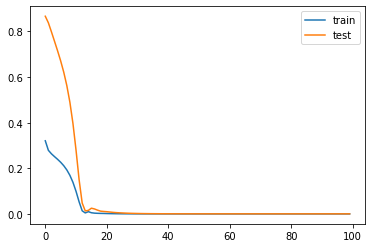

In [ ]:
# fit network
history = model.fit(train_X,
                    train_y,
                    epochs=100,
                    batch_size=72,
                    validation_data=(test_X, test_y),
                    verbose=1,
                    shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from math import sqrt

#делаем предсказание
yhat = model.predict(test_X)

# обратное масштабирование для прогноза
inv_yhat = yhat #scaler.inverse_transform(yhat)
#inv_yhat = inv_yhat[:,0]
# обратное масштабирование для фактического
inv_y = test_y #scaler.inverse_transform(test_y)
#inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.019


(995, 6, 1) (995, 1)


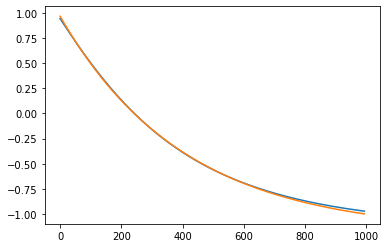

In [ ]:
# Соединяем обратно входные данные
X = np.concatenate((train_X, test_X), axis=0)
Y_real = np.concatenate((train_y, test_y), axis=0)
#делаем предсказание
Y = model.predict(X)

print(X.shape, Y.shape)

plt.plot(Y)
plt.plot(Y_real)